In [39]:
test <- seq(1:100)
test <- data.frame(cbind(test), c(rep('green', 30), rep('blue', 20), rep('green', 50)))
names(test)[2] <- 'color'

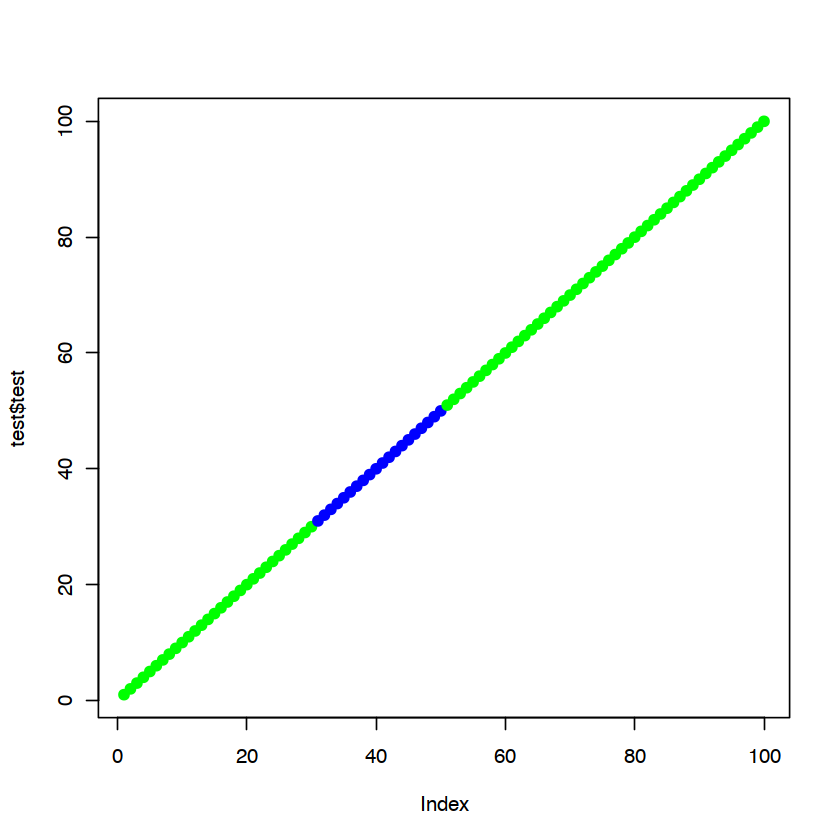

In [40]:
plot(test$test, pch=19, col=test$color)

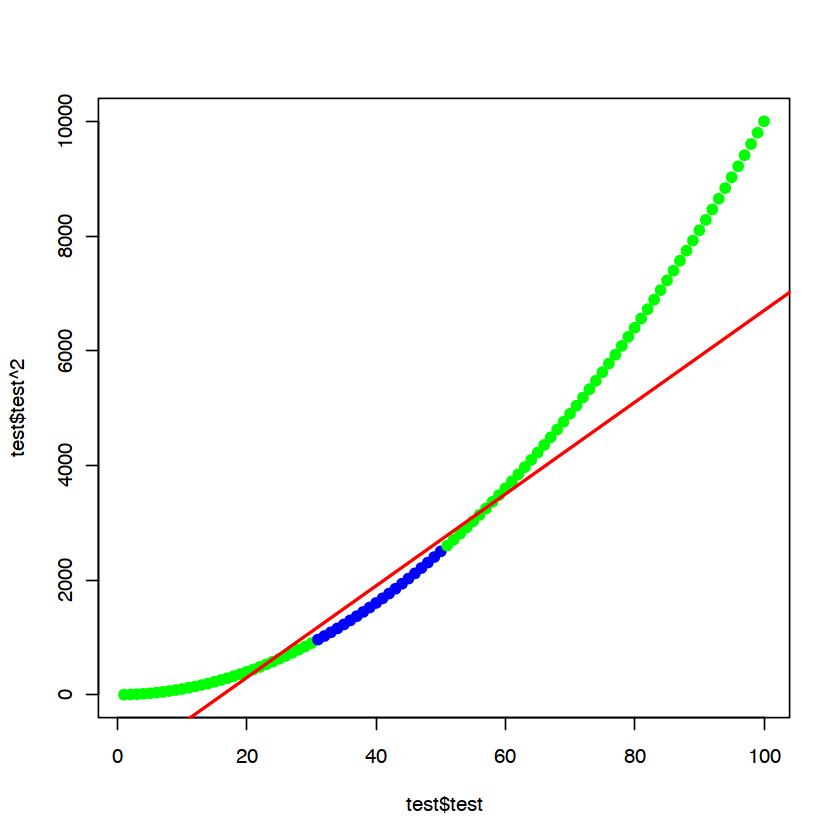

In [42]:
plot(test$test, test$test^2, pch=19, col=test$color)
abline(-1300, 80, col='red', lwd=2)

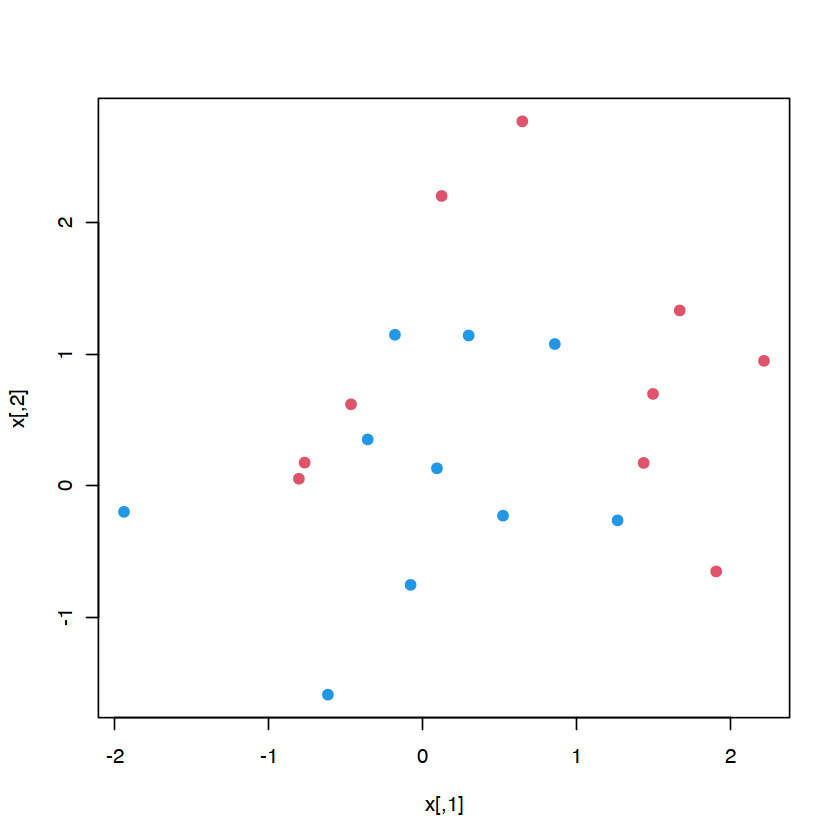

In [1]:
# generate some data for a 2 class problem

# create 2 predictors with 20 values each
x <- matrix(rnorm(20*2), ncol=2)

# create binary response classes with 20 values
y <- c(rep(-1,10), rep(1,10))

# shift x1 to have some overlapping, but separable prdictors
x[y==1,]=x[y==1,] + 1

# plot it
plot(x, col=(3-y), pch=19)



In [2]:
library(e1071)


Warning message:
“package ‘e1071’ was built under R version 4.0.2”


In [3]:
# format in data frame

dat <- data.frame(x=x, y=as.factor(y))

svmfit <- svm(y ~ ., data=dat, kernel="linear", cost=10, scale=FALSE)


In [4]:
print(svmfit) 


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  15



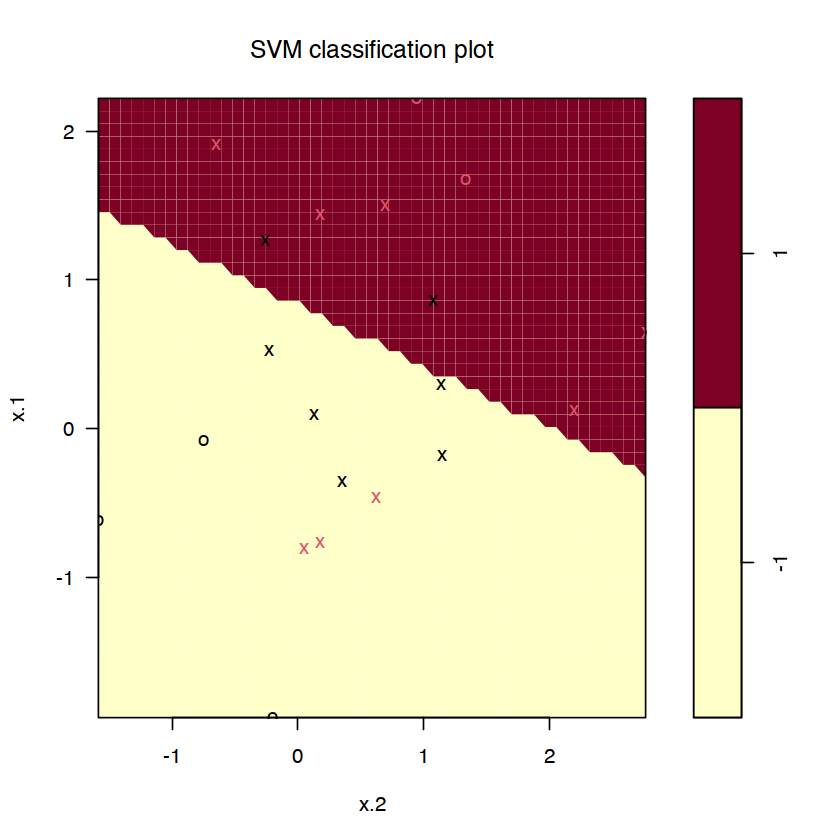

In [5]:
plot(svmfit, dat) ## bad plot

In [ ]:
# radial kernel

In [6]:
load(url('http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/ESL.mixture.rda'))

In [7]:
names(ESL.mixture)

[1] "x"        "y"        "xnew"     "prob"     "marginal" "px1"      "px2"     
[8] "means"

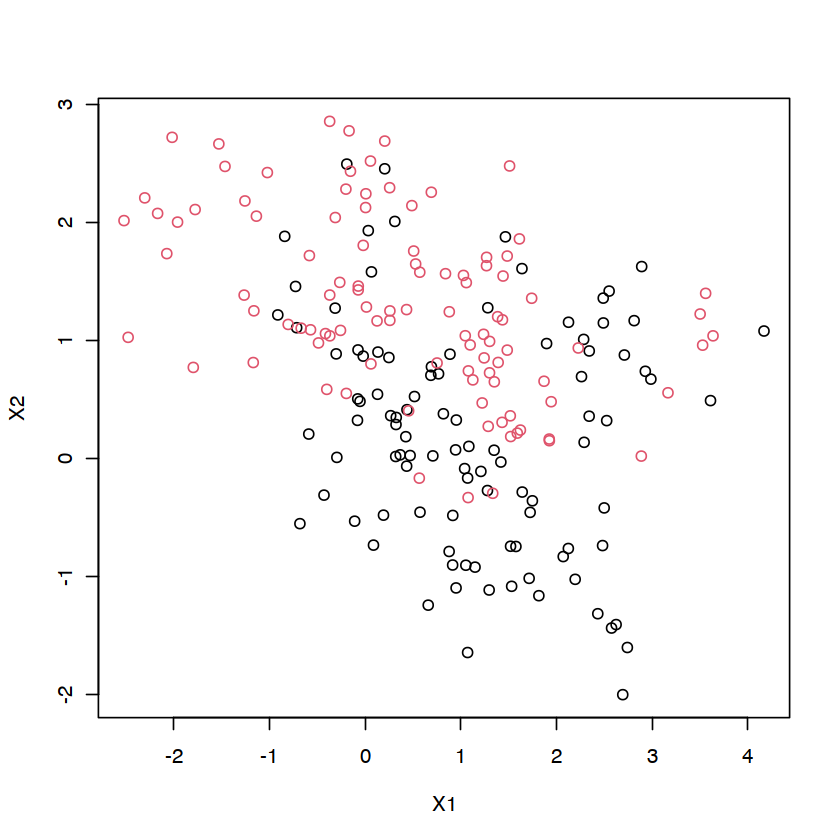

In [8]:
rad.data <- data.frame(factor(ESL.mixture$y), ESL.mixture$x)
names(rad.data)[1] <- "y"
plot(X2 ~ X1, rad.data, col=y)

In [11]:
radfit <- svm(y ~ ., data=rad.data, kernel="radial", cost=5, scale=FALSE)


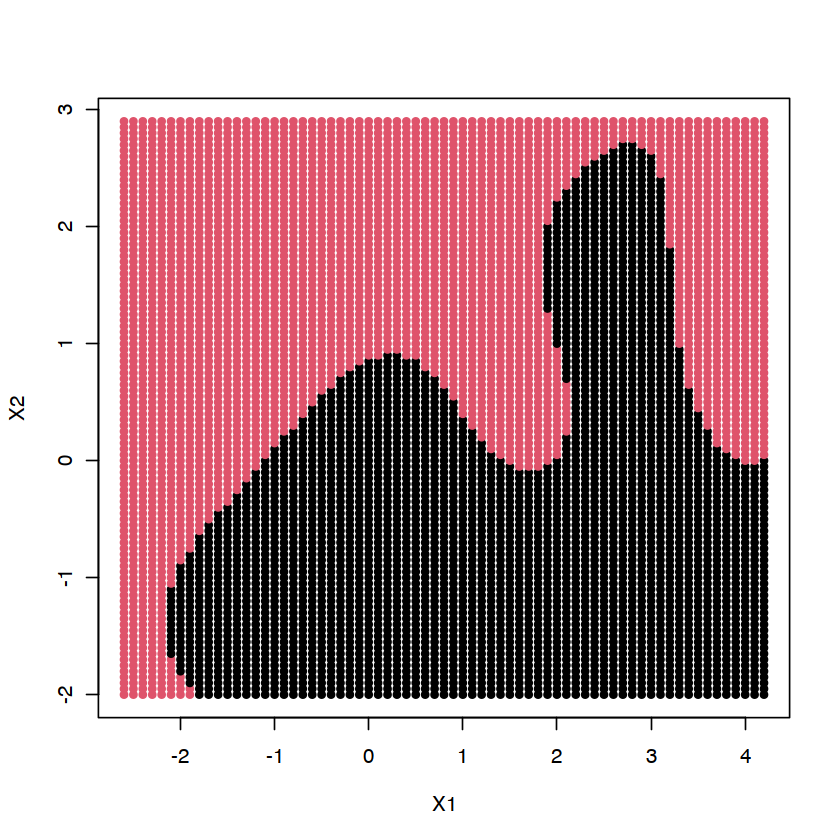

In [12]:
# make a grid of points to color later for showing the boundary nicer
xgrid <- expand.grid(X1=ESL.mixture$px1, X2=ESL.mixture$px2)

# predict the class label for each point on the grid
ygrid <- predict(radfit, xgrid)

# plot the space
plot(xgrid, col=as.numeric(ygrid), pch=20)


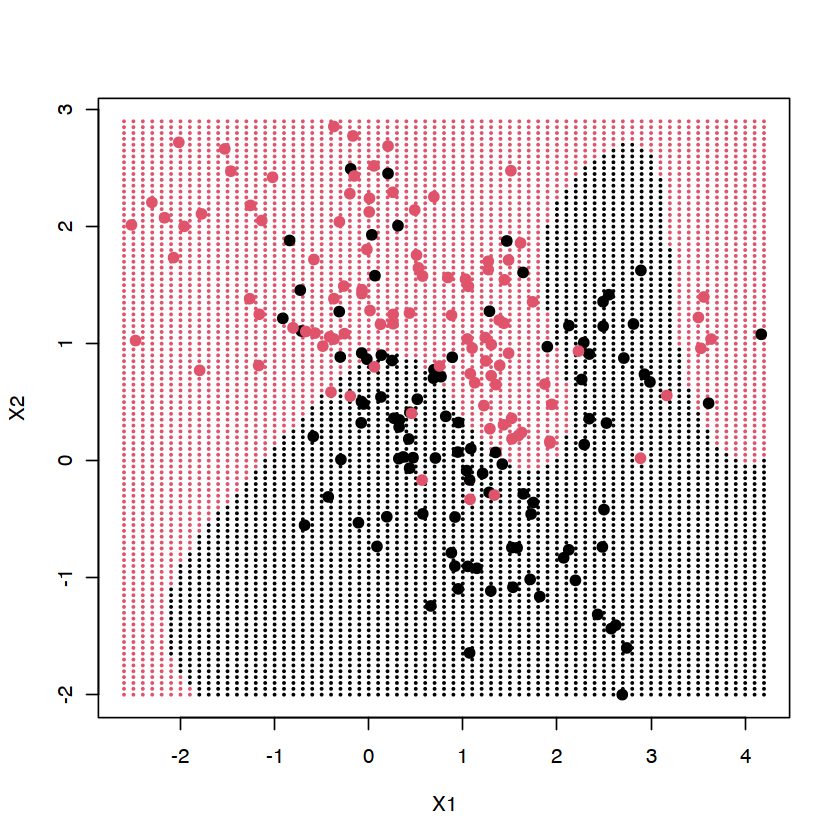

In [13]:
plot(xgrid, col=as.numeric(ygrid), pch=20, cex=.2)
points(X2 ~ X1, rad.data, pch=19, col=y)

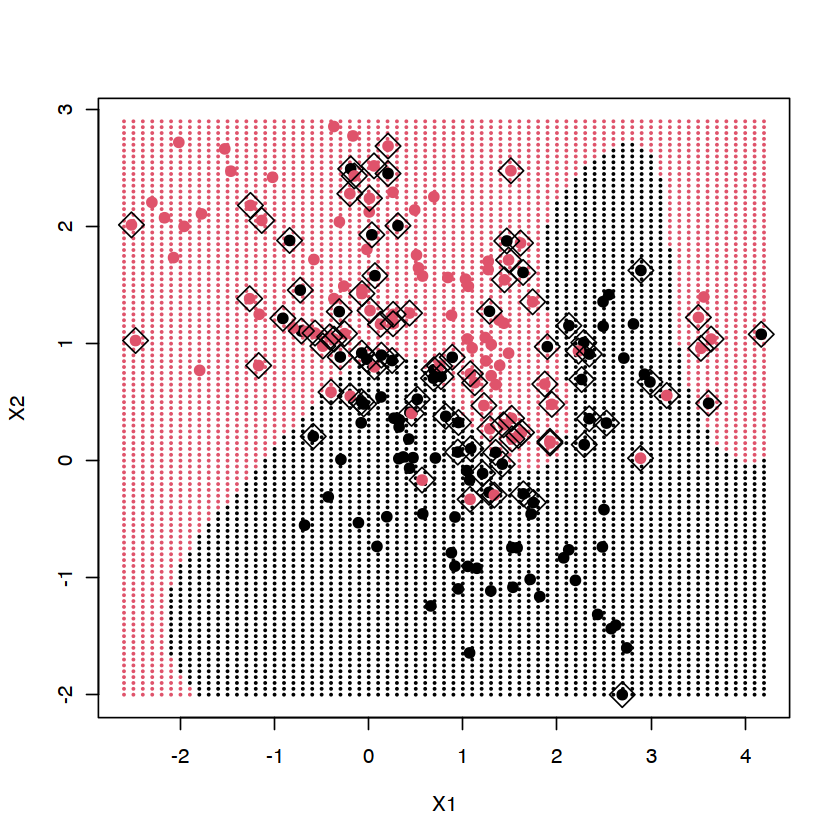

In [14]:

plot(xgrid, col=as.numeric(ygrid), pch=20, cex=.2)
points(X2 ~ X1, rad.data, pch=19, col=y)

# show the support vectors
points(X2[radfit$index] ~ X1[radfit$index], rad.data, pch=5, cex=2)